In [ ]:
#Decision Tree

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


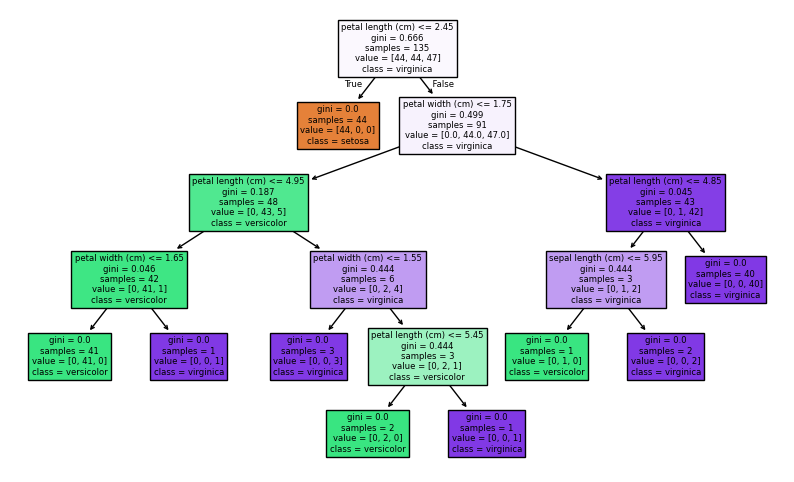

In [2]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


In [3]:
#this random forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [5]:
# Feature importance

In [6]:
import pandas as pd

importance = model.feature_importances_
for name, score in zip(iris.feature_names, importance):
    print(name, score)


sepal length (cm) 0.10809762464246378
sepal width (cm) 0.030386812473242528
petal length (cm) 0.43999397414456937
petal width (cm) 0.4215215887397244


In [7]:
#Regression

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=2000,
    random_state=42
)
model.fit(X_train, y_train)


,n_estimators,2000
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
#BOOST ML Model To make it MORE acurate

In [10]:
#XGBoost

In [11]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [12]:
#LightGBM

In [13]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1
)
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [14]:
#CatBoost

In [15]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0)
model.fit(X_train, y_train)


In [ ]:
# K-Means

In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

model = KMeans(n_clusters=4, random_state=42)
model.fit(X)

print("Cluster centers:\n", model.cluster_centers_)
print("Labels:\n", model.labels_)


Cluster centers:
 [[6.29183673 2.8877551  4.92653061 1.7122449 ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [7.08695652 3.12608696 6.01304348 2.14347826]]
Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 0 3 3 2 3 3 3 0
 0 3 0 0 0 0 3 3 0 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 3 0 0 3 3 0 0 3 3 0 0 0
 0 0]


In [26]:
#Visualizing clusters

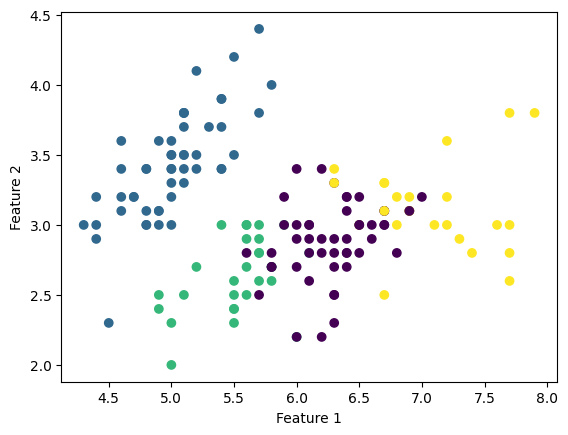

In [27]:
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
#ELBow

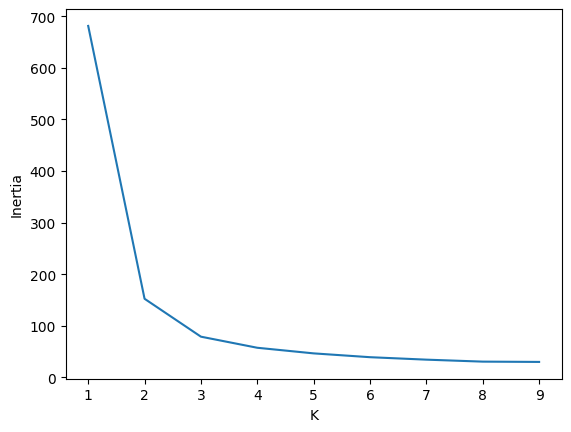

In [28]:
inertias = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()


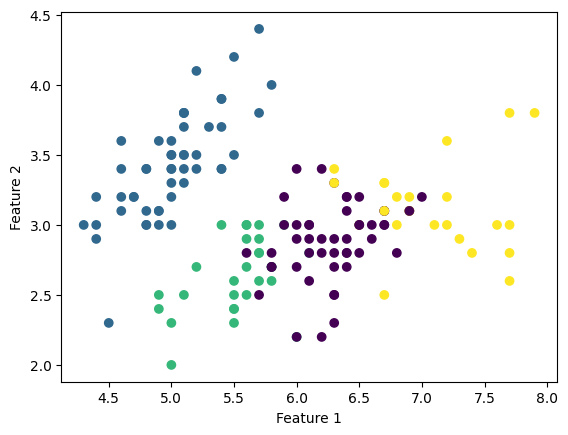

In [30]:
#Notes about scaling

#Important:
#K-Means works best when data is scaled:

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

##
plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
#PCA: PCA Example using Iris Dataset

In [31]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (150, 4)
Reduced shape: (150, 2)


In [ ]:
#Visualize results

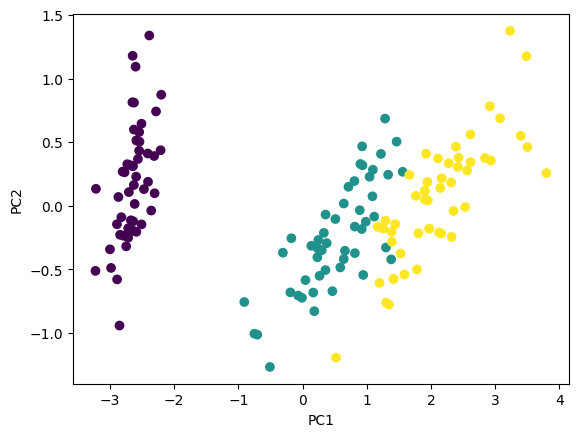

In [32]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=iris.target)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
#See explained variance

In [33]:
print(pca.explained_variance_ratio_)


[0.92461872 0.05306648]
